In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from operator import add

# Generate a Pseudo ADNI Dataset

## Multivariate Gaussian Distribution

A simple way to generate synthetic datapoints such that they look like coming from a given real dataset (e.g. [ADNI](http://adni.loni.usc.edu/)) is to fit a [__Multivariate Gaussian Distribution__](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) to the real datapoints and then sample new synthetic datapoints from this distribution:

$\mathbf{x} \sim \mathcal{N}(\mathbf{\mu}; \mathbf{\Sigma})$,
where
$\mathbf{\mu} = \mathbb{E}[\mathbf{x}_{\text{real}}]$,
and
$\mathbf{\Sigma} = \mathbb{E}[(\mathbf{x}_{\text{real}} - \mathbf{\mu})(\mathbf{x}_{\text{real}} - \mathbf{\mu})^T]$

In [45]:
# Define function to fit and sample from a Multivariate Gaussian

# Remember that to be compliant with numpy (and many other python libraries)
# you have to transpose your variables:
# e.g. Covariance = E[xx'] becomes Covariance = E[(xx')'] = E[x'x]

def sample_like(data, n_samples=1000):
	data_mean = data.mean(0)
	data_cov = (data - data_mean).T.dot(data - data_mean) / len(data)
	data_samples = np.random.multivariate_normal(mean=data_mean, cov=data_cov, size=n_samples)
	return data_samples

In [46]:
# Load Real Data

base_url = 'https://marcolorenzi.github.io/material/winter_school/'

df = {
	'demog': pd.read_csv(base_url+'demog.csv'),
	'cognition': pd.read_csv(base_url+'cognition.csv'),
	'volumes': pd.read_csv(base_url+'volumes.csv'),
	'apoe': pd.read_csv(base_url+'apoe.csv'),
	'fluid': pd.read_csv(base_url+'fluid.csv'),	
}

col = {
	'demog': ['SEX', 'AGE', 'PTEDUCAT'],
	'cognition': ['CDRSB.bl', 'ADAS11.bl', 'MMSE.bl', 'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl', 'FAQ.bl'],
	'volumes': ['WholeBrain.bl', 'Ventricles.bl', 'Hippocampus.bl', 'MidTemp.bl', 'Entorhinal.bl'],
	'apoe': ['APOE4'],
	'fluid': ['ABETA.MEDIAN.bl', 'PTAU.MEDIAN.bl', 'TAU.MEDIAN.bl'],
}

all_cols = reduce(add, col.values())

real_adni = pd.concat(df.values(), axis=1)[all_cols]

In [47]:
# Create Pseudo Dataset

data_samples = sample_like(real_adni.values)

pseudo_adni = pd.DataFrame(data_samples, columns=all_cols)

In [48]:
pseudo_adni['MMSE.bl'] = np.floor(pseudo_adni['MMSE.bl'])

pseudo_adni['MMSE.bl'][pseudo_adni['MMSE.bl']>30] = 30

In [49]:
pseudo_adni['SEX']  = np.sign(pseudo_adni['SEX']).replace(-1,0)

In [58]:
pseudo_adni['ADAS11.bl'] = np.floor(pseudo_adni['ADAS11.bl']).astype('int32')
pseudo_adni['ADAS11.bl'][pseudo_adni['ADAS11.bl']<0] = 0

pseudo_adni['CDRSB.bl'] = np.floor(pseudo_adni['CDRSB.bl']).astype('int32')
pseudo_adni['CDRSB.bl'][pseudo_adni['CDRSB.bl']<0] = 0

pseudo_adni['FAQ.bl'] = np.floor(pseudo_adni['FAQ.bl']).astype('int32')
pseudo_adni['FAQ.bl'][pseudo_adni['FAQ.bl']<0] = 0

pseudo_adni['AGE'] = np.floor(pseudo_adni['AGE'])

pseudo_adni['RAVLT.learning.bl'] = np.floor(pseudo_adni['RAVLT.learning.bl'])
pseudo_adni['RAVLT.learning.bl'][pseudo_adni['RAVLT.learning.bl']<0] = 0

pseudo_adni['APOE4'] = np.floor(pseudo_adni['APOE4']).astype('int32')
pseudo_adni['APOE4'][pseudo_adni['APOE4']<0] = 0

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/

In [59]:
pseudo_adni

,SEX,AGE,PTEDUCAT,CDRSB.bl,ADAS11.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,FAQ.bl,WholeBrain.bl,Ventricles.bl,Hippocampus.bl,MidTemp.bl,Entorhinal.bl,APOE4,ABETA.MEDIAN.bl,PTAU.MEDIAN.bl,TAU.MEDIAN.bl
0,1.0,75.0,12.437425,1,8,27.0,23.739439,4.0,5.821573,3,0.684331,0.012699,0.003786,0.012678,0.002214,0,154.016065,67.970509,132.571916
1,1.0,67.0,20.733563,0,0,30.0,64.933800,9.0,4.001653,0,0.735892,0.012803,0.004866,0.015071,0.003041,0,211.573206,5.451168,33.787719
2,1.0,63.0,17.094205,0,8,24.0,36.987722,3.0,6.876316,0,0.738731,0.030492,0.004300,0.012419,0.002316,0,163.637668,66.704378,110.049924
3,1.0,75.0,18.605217,0,3,29.0,50.314425,5.0,4.733481,3,0.696179,0.032797,0.004720,0.012312,0.002593,0,182.256297,47.091893,138.690457
4,0.0,65.0,18.341332,0,0,30.0,57.217830,9.0,7.225401,0,0.841806,0.004030,0.006820,0.016948,0.002896,0,247.997479,-5.997140,-61.573234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,76.0,21.703722,1,2,29.0,61.896022,8.0,1.663102,0,0.767153,0.011417,0.005209,0.012879,0.002208,0,231.706787,24.632786,87.065806
996,1.0,77.0,19.073633,0,1,29.0,62.083170,8.0,5.241477,1,0.695168,0.011908,0.004641,0.012534,0.002197,1,146.949187,57.588115,121.985248
997,1.0,74.0,18.298129,3,14,24.0,22.289059,2.0,5.437600,7,0.628691,0.041537,0.003478,0.010870,0.001939,0,181.805672,55.052669,157.229102
998,1.0,64.0,20.235125,0,13,26.0,31.650504,2.0,1.669603,4,0.714763,0.020461,0.004713,0.013989,0.001981,0,178.824412,69.412821,103.238647


## The Synthetic Dataset is a (good?) approximation

### Modeling integer constrained values

MMSE is an integer valued cognition indicator which is constrained in the range 0-30.

Modeling it as a real unconstrained value is an approximation.

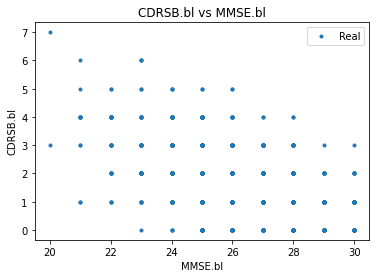

In [65]:
# Plot
def plot_real_synth(xcol='MMSE.bl', ycol='CDRSB.bl'):
    plt.figure()
    plt.title(f'{ycol} vs {xcol}')
    #plt.plot(real_adni[xcol], real_adni[ycol], '.')
    plt.plot(pseudo_adni[xcol], pseudo_adni[ycol], '.')
    plt.ylabel(ycol)
    plt.xlabel(xcol)
    plt.legend(['Real', 'Pseudo'])

plot_real_synth()

### Approximating a binary value with a scalar one

What do you think?

Is it acceptable?

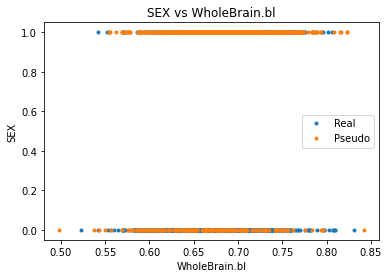

In [61]:
plot_real_synth(ycol='SEX', xcol='WholeBrain.bl')

In [66]:
# Save Data
pseudo_adni.to_csv('pseudo_adni.csv', index=False)